# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

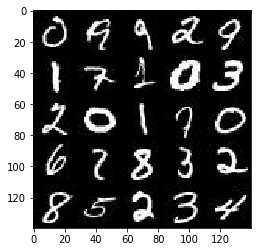

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

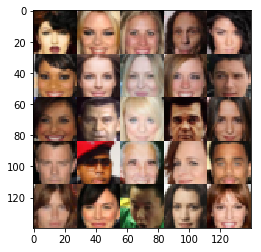

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels])
    input_z = tf.placeholder(tf.float32, [None, z_dim])
    learning_rate = tf.placeholder(tf.float32)
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        #input layer is 28*28
        x1 = tf.layers.conv2d(images, 64, 5, strides=2 ,padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #now is 14*14*64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #now is 7*7*128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #now is 4*4*256
        
        x4 = tf.layers.conv2d(relu2, 512, 5, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu3 = tf.maximum(alpha * bn4, bn4)
        #now is 4*4*512
        
        flat = tf.reshape(relu3, [-1, 4*4*512])
        logits = tf.layers.dense(flat, 1)
        out = tf.nn.sigmoid(logits)
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        #first fully connected
        x1 = tf.layers.dense(z, 7*7*512)
        #reshape
        alpha = 0.2
        x1 = tf.reshape(x1, [-1, 7, 7, 512])
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #now is 7*7*512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #now is 14*14*256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #now is 28*28*128
        
        #output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.nn.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real * 2)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    #samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=[batch_size, z_dim])
                #Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if(steps % 10 == 0):
                    #Get and print losses
                    train_loss_d = sess.run(d_loss, feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = sess.run(g_loss, feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator loss: {:.4f}".format(train_loss_d),
                         "Generator loss: {:.4f}".format(train_loss_g))
                    #Save losses
                    #losses.append((train_loss_d, train_loss_g))
                
                if(steps % 100 == 0):
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
            
        saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator loss: 1.6526 Generator loss: 0.5014
Epoch 1/2... Discriminator loss: 1.3108 Generator loss: 0.7117
Epoch 1/2... Discriminator loss: 1.2066 Generator loss: 0.8108
Epoch 1/2... Discriminator loss: 1.2063 Generator loss: 0.7716
Epoch 1/2... Discriminator loss: 1.1461 Generator loss: 0.7775
Epoch 1/2... Discriminator loss: 1.1608 Generator loss: 0.8298
Epoch 1/2... Discriminator loss: 1.0615 Generator loss: 1.0009
Epoch 1/2... Discriminator loss: 1.3130 Generator loss: 0.8783
Epoch 1/2... Discriminator loss: 0.6372 Generator loss: 1.2541
Epoch 1/2... Discriminator loss: 1.6721 Generator loss: 1.0733


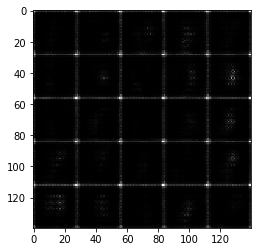

Epoch 1/2... Discriminator loss: 1.2703 Generator loss: 0.7697
Epoch 1/2... Discriminator loss: 1.3673 Generator loss: 0.7856
Epoch 1/2... Discriminator loss: 1.2907 Generator loss: 0.7616
Epoch 1/2... Discriminator loss: 1.3028 Generator loss: 0.7256
Epoch 1/2... Discriminator loss: 1.3565 Generator loss: 0.7125
Epoch 1/2... Discriminator loss: 1.2744 Generator loss: 0.7602
Epoch 1/2... Discriminator loss: 1.3462 Generator loss: 0.7655
Epoch 1/2... Discriminator loss: 1.3072 Generator loss: 0.7416
Epoch 1/2... Discriminator loss: 1.3207 Generator loss: 0.7027
Epoch 1/2... Discriminator loss: 1.2851 Generator loss: 0.7256


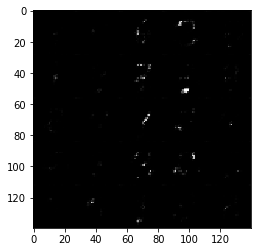

Epoch 1/2... Discriminator loss: 1.3057 Generator loss: 0.7531
Epoch 1/2... Discriminator loss: 1.2839 Generator loss: 0.7149
Epoch 1/2... Discriminator loss: 1.2479 Generator loss: 0.7621
Epoch 1/2... Discriminator loss: 1.2739 Generator loss: 0.7556
Epoch 1/2... Discriminator loss: 1.2889 Generator loss: 0.7444
Epoch 1/2... Discriminator loss: 1.2212 Generator loss: 0.7892
Epoch 1/2... Discriminator loss: 1.2367 Generator loss: 0.7910
Epoch 1/2... Discriminator loss: 1.1950 Generator loss: 0.7838
Epoch 1/2... Discriminator loss: 1.2590 Generator loss: 0.7766
Epoch 1/2... Discriminator loss: 1.2754 Generator loss: 0.7353


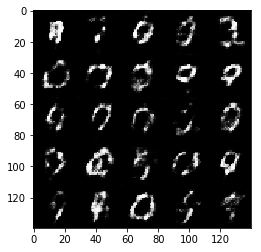

Epoch 1/2... Discriminator loss: 1.1706 Generator loss: 0.8084
Epoch 1/2... Discriminator loss: 1.2318 Generator loss: 0.7459
Epoch 1/2... Discriminator loss: 1.2028 Generator loss: 0.7854
Epoch 1/2... Discriminator loss: 1.2686 Generator loss: 0.8439
Epoch 1/2... Discriminator loss: 1.2098 Generator loss: 0.7838
Epoch 1/2... Discriminator loss: 1.2216 Generator loss: 0.7850
Epoch 1/2... Discriminator loss: 1.1974 Generator loss: 0.8613
Epoch 1/2... Discriminator loss: 1.1983 Generator loss: 0.8474
Epoch 1/2... Discriminator loss: 1.2579 Generator loss: 0.7362
Epoch 1/2... Discriminator loss: 1.2788 Generator loss: 0.7138


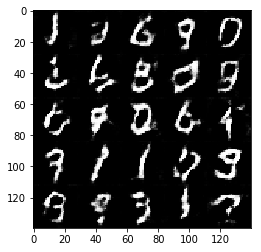

Epoch 1/2... Discriminator loss: 1.2553 Generator loss: 0.8678
Epoch 1/2... Discriminator loss: 1.1985 Generator loss: 0.8245
Epoch 1/2... Discriminator loss: 1.2533 Generator loss: 0.7767
Epoch 1/2... Discriminator loss: 1.1848 Generator loss: 0.7650
Epoch 1/2... Discriminator loss: 1.2325 Generator loss: 0.8353
Epoch 1/2... Discriminator loss: 1.1729 Generator loss: 0.8808
Epoch 2/2... Discriminator loss: 1.1224 Generator loss: 0.9406
Epoch 2/2... Discriminator loss: 1.0724 Generator loss: 1.0610
Epoch 2/2... Discriminator loss: 1.1476 Generator loss: 0.9066
Epoch 2/2... Discriminator loss: 1.1827 Generator loss: 1.1270


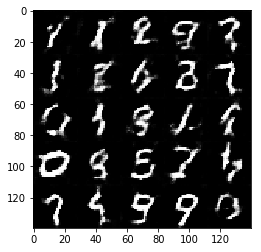

Epoch 2/2... Discriminator loss: 1.1681 Generator loss: 0.8571
Epoch 2/2... Discriminator loss: 1.2131 Generator loss: 0.8330
Epoch 2/2... Discriminator loss: 1.2155 Generator loss: 0.7797
Epoch 2/2... Discriminator loss: 1.2310 Generator loss: 0.7612
Epoch 2/2... Discriminator loss: 1.2991 Generator loss: 0.7573
Epoch 2/2... Discriminator loss: 1.3217 Generator loss: 0.7624
Epoch 2/2... Discriminator loss: 1.2136 Generator loss: 0.8262
Epoch 2/2... Discriminator loss: 1.1986 Generator loss: 0.7733
Epoch 2/2... Discriminator loss: 1.3201 Generator loss: 0.8572
Epoch 2/2... Discriminator loss: 1.2186 Generator loss: 0.7860


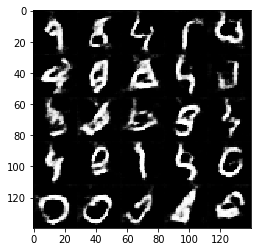

Epoch 2/2... Discriminator loss: 1.2067 Generator loss: 0.7557
Epoch 2/2... Discriminator loss: 1.2805 Generator loss: 0.8617
Epoch 2/2... Discriminator loss: 1.2058 Generator loss: 0.7941
Epoch 2/2... Discriminator loss: 1.2230 Generator loss: 0.7710
Epoch 2/2... Discriminator loss: 1.2267 Generator loss: 0.8029
Epoch 2/2... Discriminator loss: 1.2261 Generator loss: 0.7613
Epoch 2/2... Discriminator loss: 1.2883 Generator loss: 0.7866
Epoch 2/2... Discriminator loss: 1.2497 Generator loss: 0.7734
Epoch 2/2... Discriminator loss: 1.2550 Generator loss: 0.7833
Epoch 2/2... Discriminator loss: 1.2815 Generator loss: 0.8083


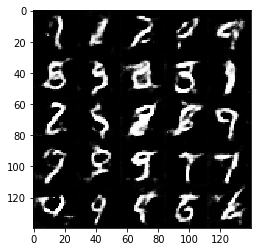

Epoch 2/2... Discriminator loss: 1.2793 Generator loss: 0.8047
Epoch 2/2... Discriminator loss: 1.2769 Generator loss: 0.7898
Epoch 2/2... Discriminator loss: 1.3363 Generator loss: 0.8819
Epoch 2/2... Discriminator loss: 1.2249 Generator loss: 0.7896
Epoch 2/2... Discriminator loss: 1.2335 Generator loss: 0.7729
Epoch 2/2... Discriminator loss: 1.2540 Generator loss: 0.7317
Epoch 2/2... Discriminator loss: 1.2569 Generator loss: 0.7428
Epoch 2/2... Discriminator loss: 1.2086 Generator loss: 0.8166
Epoch 2/2... Discriminator loss: 1.3774 Generator loss: 0.9495
Epoch 2/2... Discriminator loss: 1.2551 Generator loss: 0.8233


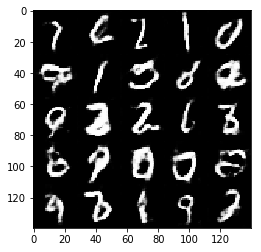

Epoch 2/2... Discriminator loss: 1.1949 Generator loss: 0.7823
Epoch 2/2... Discriminator loss: 1.1976 Generator loss: 0.8109
Epoch 2/2... Discriminator loss: 1.2054 Generator loss: 0.8166
Epoch 2/2... Discriminator loss: 1.1684 Generator loss: 0.7990
Epoch 2/2... Discriminator loss: 1.2413 Generator loss: 0.7998
Epoch 2/2... Discriminator loss: 1.1624 Generator loss: 0.7908
Epoch 2/2... Discriminator loss: 1.2619 Generator loss: 0.8684
Epoch 2/2... Discriminator loss: 1.1694 Generator loss: 0.8143
Epoch 2/2... Discriminator loss: 1.1908 Generator loss: 0.7440
Epoch 2/2... Discriminator loss: 1.2083 Generator loss: 0.8672


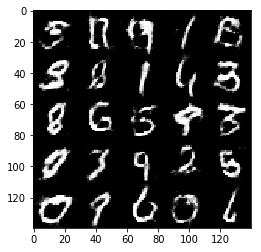

Epoch 2/2... Discriminator loss: 1.1955 Generator loss: 0.6680
Epoch 2/2... Discriminator loss: 1.1756 Generator loss: 0.8011
Epoch 2/2... Discriminator loss: 1.2917 Generator loss: 0.5938


In [20]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator loss: 1.7020 Generator loss: 0.4371
Epoch 1/1... Discriminator loss: 1.5449 Generator loss: 0.5700
Epoch 1/1... Discriminator loss: 1.4425 Generator loss: 0.6800
Epoch 1/1... Discriminator loss: 1.2826 Generator loss: 0.7585
Epoch 1/1... Discriminator loss: 1.2122 Generator loss: 0.7872
Epoch 1/1... Discriminator loss: 0.8955 Generator loss: 1.0158
Epoch 1/1... Discriminator loss: 0.9305 Generator loss: 1.2779
Epoch 1/1... Discriminator loss: 0.9500 Generator loss: 1.1149
Epoch 1/1... Discriminator loss: 1.0417 Generator loss: 1.4163
Epoch 1/1... Discriminator loss: 0.8844 Generator loss: 1.0560


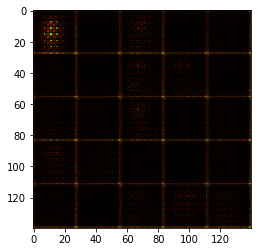

Epoch 1/1... Discriminator loss: 0.6169 Generator loss: 1.3898
Epoch 1/1... Discriminator loss: 0.4760 Generator loss: 1.7806
Epoch 1/1... Discriminator loss: 0.4272 Generator loss: 1.9434
Epoch 1/1... Discriminator loss: 0.4510 Generator loss: 1.7721
Epoch 1/1... Discriminator loss: 0.3842 Generator loss: 1.6309
Epoch 1/1... Discriminator loss: 0.2437 Generator loss: 2.1218
Epoch 1/1... Discriminator loss: 0.1811 Generator loss: 2.4645
Epoch 1/1... Discriminator loss: 0.1466 Generator loss: 2.4414
Epoch 1/1... Discriminator loss: 0.5201 Generator loss: 2.2772
Epoch 1/1... Discriminator loss: 0.3001 Generator loss: 2.0092


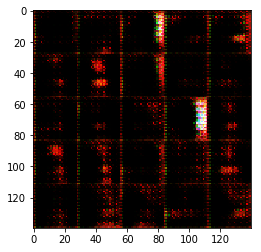

Epoch 1/1... Discriminator loss: 0.4793 Generator loss: 1.2812
Epoch 1/1... Discriminator loss: 0.2814 Generator loss: 2.3803
Epoch 1/1... Discriminator loss: 1.5197 Generator loss: 0.7672
Epoch 1/1... Discriminator loss: 0.6891 Generator loss: 1.5605
Epoch 1/1... Discriminator loss: 0.4645 Generator loss: 2.0638
Epoch 1/1... Discriminator loss: 0.7604 Generator loss: 1.3192
Epoch 1/1... Discriminator loss: 0.8788 Generator loss: 0.9605
Epoch 1/1... Discriminator loss: 1.4517 Generator loss: 0.7065
Epoch 1/1... Discriminator loss: 0.8335 Generator loss: 1.1947
Epoch 1/1... Discriminator loss: 1.3364 Generator loss: 0.5692


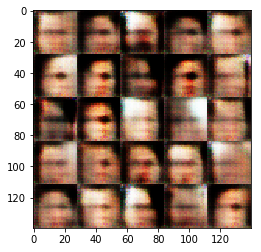

Epoch 1/1... Discriminator loss: 1.1581 Generator loss: 1.0132
Epoch 1/1... Discriminator loss: 1.0796 Generator loss: 1.0613
Epoch 1/1... Discriminator loss: 1.4743 Generator loss: 0.4771
Epoch 1/1... Discriminator loss: 1.1818 Generator loss: 0.7931
Epoch 1/1... Discriminator loss: 1.5938 Generator loss: 0.4674
Epoch 1/1... Discriminator loss: 1.0489 Generator loss: 0.8099
Epoch 1/1... Discriminator loss: 1.3135 Generator loss: 1.0693
Epoch 1/1... Discriminator loss: 1.2882 Generator loss: 1.0216
Epoch 1/1... Discriminator loss: 1.3091 Generator loss: 0.6809
Epoch 1/1... Discriminator loss: 1.3490 Generator loss: 0.6926


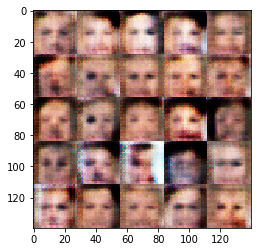

Epoch 1/1... Discriminator loss: 1.2776 Generator loss: 1.0051
Epoch 1/1... Discriminator loss: 1.3525 Generator loss: 0.7679
Epoch 1/1... Discriminator loss: 1.0828 Generator loss: 0.8586
Epoch 1/1... Discriminator loss: 1.1038 Generator loss: 1.3432
Epoch 1/1... Discriminator loss: 1.4133 Generator loss: 0.9183
Epoch 1/1... Discriminator loss: 1.3291 Generator loss: 0.6243
Epoch 1/1... Discriminator loss: 1.0200 Generator loss: 1.0715
Epoch 1/1... Discriminator loss: 1.0565 Generator loss: 1.0814
Epoch 1/1... Discriminator loss: 1.2834 Generator loss: 0.5366
Epoch 1/1... Discriminator loss: 1.1447 Generator loss: 1.2712


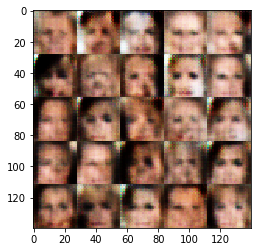

Epoch 1/1... Discriminator loss: 1.5429 Generator loss: 0.5970
Epoch 1/1... Discriminator loss: 1.3351 Generator loss: 1.0420
Epoch 1/1... Discriminator loss: 1.2157 Generator loss: 0.6076
Epoch 1/1... Discriminator loss: 1.2685 Generator loss: 0.7381
Epoch 1/1... Discriminator loss: 1.1686 Generator loss: 1.1288
Epoch 1/1... Discriminator loss: 1.0361 Generator loss: 0.7356
Epoch 1/1... Discriminator loss: 1.2472 Generator loss: 0.7106
Epoch 1/1... Discriminator loss: 1.4216 Generator loss: 0.6832
Epoch 1/1... Discriminator loss: 1.2074 Generator loss: 0.7883
Epoch 1/1... Discriminator loss: 1.2332 Generator loss: 1.3383


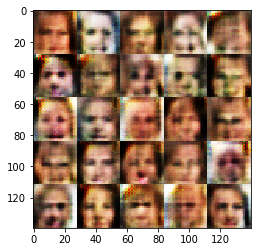

Epoch 1/1... Discriminator loss: 1.3235 Generator loss: 0.8258
Epoch 1/1... Discriminator loss: 1.1717 Generator loss: 0.8643
Epoch 1/1... Discriminator loss: 1.0323 Generator loss: 0.7800
Epoch 1/1... Discriminator loss: 1.3408 Generator loss: 0.9797
Epoch 1/1... Discriminator loss: 1.2037 Generator loss: 0.8873
Epoch 1/1... Discriminator loss: 1.2885 Generator loss: 0.8612
Epoch 1/1... Discriminator loss: 1.1689 Generator loss: 0.7564
Epoch 1/1... Discriminator loss: 1.2220 Generator loss: 0.6739
Epoch 1/1... Discriminator loss: 1.5270 Generator loss: 0.5952
Epoch 1/1... Discriminator loss: 1.1587 Generator loss: 1.2808


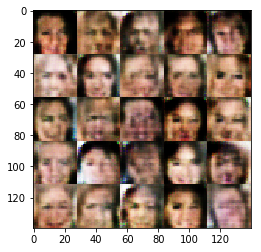

Epoch 1/1... Discriminator loss: 1.3317 Generator loss: 0.6910
Epoch 1/1... Discriminator loss: 1.3307 Generator loss: 0.7647
Epoch 1/1... Discriminator loss: 1.0336 Generator loss: 1.2183
Epoch 1/1... Discriminator loss: 1.3690 Generator loss: 0.8990
Epoch 1/1... Discriminator loss: 1.1841 Generator loss: 0.7778
Epoch 1/1... Discriminator loss: 0.9628 Generator loss: 1.1135
Epoch 1/1... Discriminator loss: 1.0271 Generator loss: 1.3247
Epoch 1/1... Discriminator loss: 1.2497 Generator loss: 0.7531
Epoch 1/1... Discriminator loss: 1.2175 Generator loss: 0.8265
Epoch 1/1... Discriminator loss: 0.9677 Generator loss: 1.1824


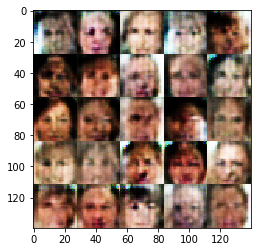

Epoch 1/1... Discriminator loss: 1.2667 Generator loss: 0.7235
Epoch 1/1... Discriminator loss: 1.3057 Generator loss: 0.5921
Epoch 1/1... Discriminator loss: 1.3141 Generator loss: 0.9525
Epoch 1/1... Discriminator loss: 1.0457 Generator loss: 1.0412
Epoch 1/1... Discriminator loss: 1.8705 Generator loss: 0.6223
Epoch 1/1... Discriminator loss: 1.0158 Generator loss: 0.9369
Epoch 1/1... Discriminator loss: 1.4620 Generator loss: 0.6853
Epoch 1/1... Discriminator loss: 1.2298 Generator loss: 0.6216
Epoch 1/1... Discriminator loss: 1.2552 Generator loss: 0.7633
Epoch 1/1... Discriminator loss: 1.0272 Generator loss: 1.1628


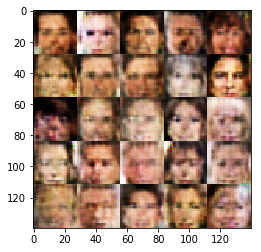

Epoch 1/1... Discriminator loss: 1.3549 Generator loss: 0.7452
Epoch 1/1... Discriminator loss: 1.0604 Generator loss: 0.8613
Epoch 1/1... Discriminator loss: 1.8725 Generator loss: 0.7387
Epoch 1/1... Discriminator loss: 1.1594 Generator loss: 0.8058
Epoch 1/1... Discriminator loss: 1.4625 Generator loss: 0.6909
Epoch 1/1... Discriminator loss: 1.1179 Generator loss: 0.8289
Epoch 1/1... Discriminator loss: 1.4938 Generator loss: 0.4661
Epoch 1/1... Discriminator loss: 1.5595 Generator loss: 0.6833
Epoch 1/1... Discriminator loss: 1.3396 Generator loss: 0.7813
Epoch 1/1... Discriminator loss: 1.1734 Generator loss: 0.8862


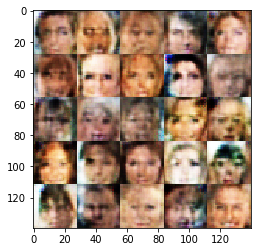

Epoch 1/1... Discriminator loss: 0.9639 Generator loss: 0.9554
Epoch 1/1... Discriminator loss: 1.1899 Generator loss: 0.6960
Epoch 1/1... Discriminator loss: 1.3493 Generator loss: 0.5623
Epoch 1/1... Discriminator loss: 1.6066 Generator loss: 0.9646
Epoch 1/1... Discriminator loss: 1.1530 Generator loss: 1.0085
Epoch 1/1... Discriminator loss: 1.2504 Generator loss: 0.8884
Epoch 1/1... Discriminator loss: 1.4037 Generator loss: 1.0609
Epoch 1/1... Discriminator loss: 1.3367 Generator loss: 0.6851
Epoch 1/1... Discriminator loss: 1.0456 Generator loss: 0.9199
Epoch 1/1... Discriminator loss: 1.2103 Generator loss: 0.7663


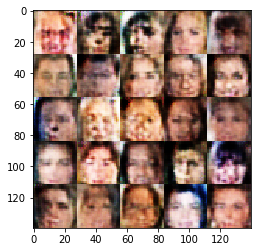

Epoch 1/1... Discriminator loss: 1.1784 Generator loss: 0.8077
Epoch 1/1... Discriminator loss: 1.2118 Generator loss: 0.7081
Epoch 1/1... Discriminator loss: 1.2398 Generator loss: 0.7282
Epoch 1/1... Discriminator loss: 1.0476 Generator loss: 0.7181
Epoch 1/1... Discriminator loss: 1.2212 Generator loss: 0.7688
Epoch 1/1... Discriminator loss: 1.8102 Generator loss: 0.2917
Epoch 1/1... Discriminator loss: 1.0800 Generator loss: 0.7526
Epoch 1/1... Discriminator loss: 1.4164 Generator loss: 0.4722
Epoch 1/1... Discriminator loss: 1.0829 Generator loss: 0.7511
Epoch 1/1... Discriminator loss: 1.5383 Generator loss: 0.4788


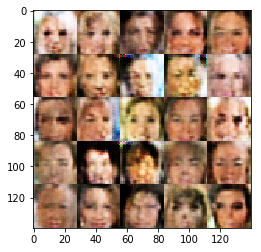

Epoch 1/1... Discriminator loss: 1.1501 Generator loss: 0.8320
Epoch 1/1... Discriminator loss: 1.4224 Generator loss: 1.0459
Epoch 1/1... Discriminator loss: 1.0866 Generator loss: 1.0230
Epoch 1/1... Discriminator loss: 1.4309 Generator loss: 0.6689
Epoch 1/1... Discriminator loss: 1.2480 Generator loss: 0.8530
Epoch 1/1... Discriminator loss: 1.2603 Generator loss: 0.5580
Epoch 1/1... Discriminator loss: 1.1144 Generator loss: 0.9818
Epoch 1/1... Discriminator loss: 1.3224 Generator loss: 0.5983
Epoch 1/1... Discriminator loss: 1.2711 Generator loss: 0.7651
Epoch 1/1... Discriminator loss: 1.2609 Generator loss: 0.6812


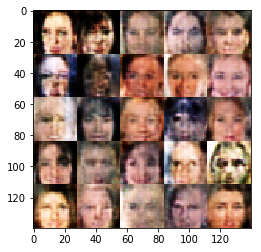

Epoch 1/1... Discriminator loss: 1.3654 Generator loss: 0.5298
Epoch 1/1... Discriminator loss: 1.3371 Generator loss: 0.7130
Epoch 1/1... Discriminator loss: 1.0761 Generator loss: 1.0992
Epoch 1/1... Discriminator loss: 1.2645 Generator loss: 0.7771
Epoch 1/1... Discriminator loss: 1.1662 Generator loss: 0.8377
Epoch 1/1... Discriminator loss: 1.2706 Generator loss: 0.8385
Epoch 1/1... Discriminator loss: 1.5424 Generator loss: 0.6489
Epoch 1/1... Discriminator loss: 1.1651 Generator loss: 1.4593
Epoch 1/1... Discriminator loss: 1.1569 Generator loss: 0.9865
Epoch 1/1... Discriminator loss: 1.1579 Generator loss: 0.8300


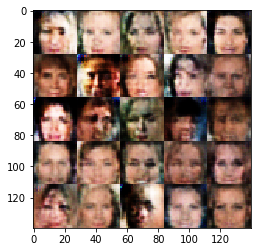

Epoch 1/1... Discriminator loss: 1.3438 Generator loss: 0.8661
Epoch 1/1... Discriminator loss: 1.3220 Generator loss: 0.9576
Epoch 1/1... Discriminator loss: 1.1712 Generator loss: 0.8614
Epoch 1/1... Discriminator loss: 1.1447 Generator loss: 0.9202
Epoch 1/1... Discriminator loss: 1.2683 Generator loss: 0.7990
Epoch 1/1... Discriminator loss: 0.9159 Generator loss: 1.5150
Epoch 1/1... Discriminator loss: 1.2922 Generator loss: 0.7817
Epoch 1/1... Discriminator loss: 1.5255 Generator loss: 0.4527
Epoch 1/1... Discriminator loss: 1.2240 Generator loss: 0.6624
Epoch 1/1... Discriminator loss: 1.3497 Generator loss: 0.5851


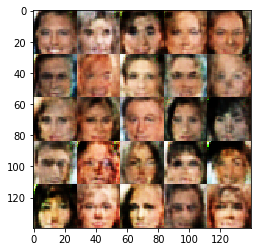

Epoch 1/1... Discriminator loss: 1.5441 Generator loss: 0.8047
Epoch 1/1... Discriminator loss: 1.1945 Generator loss: 0.9094
Epoch 1/1... Discriminator loss: 1.1896 Generator loss: 0.9239
Epoch 1/1... Discriminator loss: 1.1449 Generator loss: 0.6894
Epoch 1/1... Discriminator loss: 1.2303 Generator loss: 0.6914
Epoch 1/1... Discriminator loss: 1.2778 Generator loss: 0.9844
Epoch 1/1... Discriminator loss: 1.1747 Generator loss: 0.8794
Epoch 1/1... Discriminator loss: 1.4203 Generator loss: 0.6092


In [21]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.